#  作業

Hint: 人物原始邊框座標 (60, 40), (420, 510)

請根據 Lena 圖做以下處理

- 對明亮度做直方圖均衡處理
- 水平鏡像 + 縮放處理 (0.5 倍)
- 畫出人物矩形邊框

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lena.png')

## Hint: 矩形

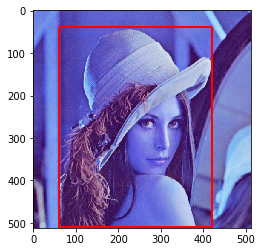

In [21]:
img_rect = img.copy()
cv2.rectangle(img_rect, (60, 40), (420, 510), (255, 0, 0), 3)
plt.imshow(img_rect)
plt.show()

## Hint: 線

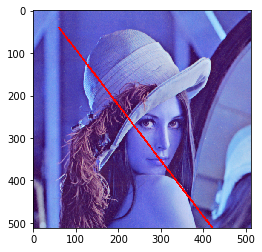

In [28]:
img_line = img.copy()
cv2.line(img_line, (60, 40), (420, 510), (255, 0, 0), 3)
plt.imshow(img_line)
plt.show()

## Hint: 文字

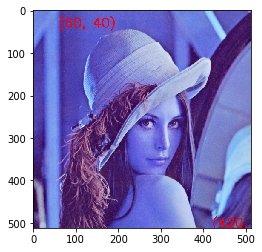

In [9]:
img_text = img.copy()
cv2.putText(img_text, '(60, 40)', (60, 40), 0, 1, (255, 0, 0), 2)
cv2.putText(img_text, '(420, 510)', (420, 510), 0, 1, (255, 0, 0), 2)
plt.imshow(img_text)
plt.show()

##  解法二

如果希望得知矩型邊框的位置

1. 顏色的操作 (對明亮度做直方圖均衡)
2. 鏡像可以透過四則運算得知
3. 透過建構 transformation matrix 做縮放
4. 把矩型邊框的點與 transformation matrix 相乘就會得到縮放後的位置
5. 畫圖

得到的圖的結果正確，同時也知道新的矩型邊框座標點

(512, 512, 3)


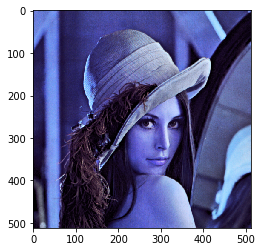

(512, 512, 3)


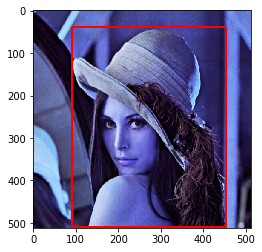

In [81]:
img_hw = img.copy()
point1 = [60, 40]
point2 = [420, 510]

"""
對明亮度做直方圖均衡
"""
# 原始 BGR 圖片轉 HSV 圖片
img_hw = cv2.cvtColor(img_hw, cv2.COLOR_BGR2HSV)

# 對明亮度做直方圖均衡 -> 對 HSV 的 V 做直方圖均衡
img_hw[..., -1] = cv2.equalizeHist(img_hw[..., -1])

# 將圖片轉回 BGR
img_hw = cv2.cvtColor(img_hw, cv2.COLOR_HSV2BGR)
print(img_hw.shape)
plt.imshow(img_hw)
plt.show()

"""
水平鏡像
"""
h, w = img_hw.shape[:2]

# 圖片鏡像
img_hw = img_hw[:, ::-1, :].copy()
print(img_hw.shape)

# 透過四則運算計算鏡像後位置
# 確保點的位置一樣是左上跟右下，所以交換鏡像後的 x 座標 (y 座標做水平鏡像後位置不變)
point1[0] = w - point1[0]
point2[0] = h - point2[0]
cv2.rectangle(img_hw, (point1[0], point1[1]), (point2[0], point2[1]), (255, 0, 0), 3)
plt.imshow(img_hw)
plt.show()

In [82]:
img.shape

(512, 512, 3)

M_scale.shape=(2, 3), bbox.shape=(2, 2)
[[226  20]
 [ 46 255]
 [  0   0]]
origin point1=[452, 40], origin point2=[92, 510]
resize point1=(226, 20), resize point2=(46, 255)


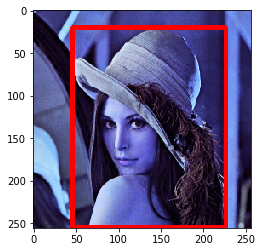

In [83]:
"""
縮放處理 (0.5 倍)
"""
fx = 0.5
fy = 0.5
resize_col = int(img_hw.shape[1]*fx)
resize_row = int(img_hw.shape[0]*fy)

# 建構 scale matrix
M_scale = np.array([[fx, 0, 0],
                    [0, fy, 0]], dtype=np.float32)

img_hw = cv2.warpAffine(img_hw, M_scale, (resize_col, resize_row))


# 把左上跟右下轉為矩陣型式
bbox = np.array((point1, point2), dtype=np.float32)
print('M_scale.shape={}, bbox.shape={}'.format(M_scale.shape, bbox.shape))

# 做矩陣乘法可以使用 `np.dot`, 為了做矩陣乘法, M_scale 需要做轉置之後才能相乘
homo_coor_result = np.dot(M_scale.T, bbox)
homo_coor_result = homo_coor_result.astype('uint8')
print(homo_coor_result)
scale_point1 = tuple(homo_coor_result[0])
scale_point2 = tuple(homo_coor_result[1])
print('origin point1={}, origin point2={}'.format(point1, point2))
print('resize point1={}, resize point2={}'.format(scale_point1, scale_point2))

# 畫圖
cv2.rectangle(img_hw, scale_point1, scale_point2, (255, 0, 0), 3)
plt.imshow(img_hw)
plt.show()